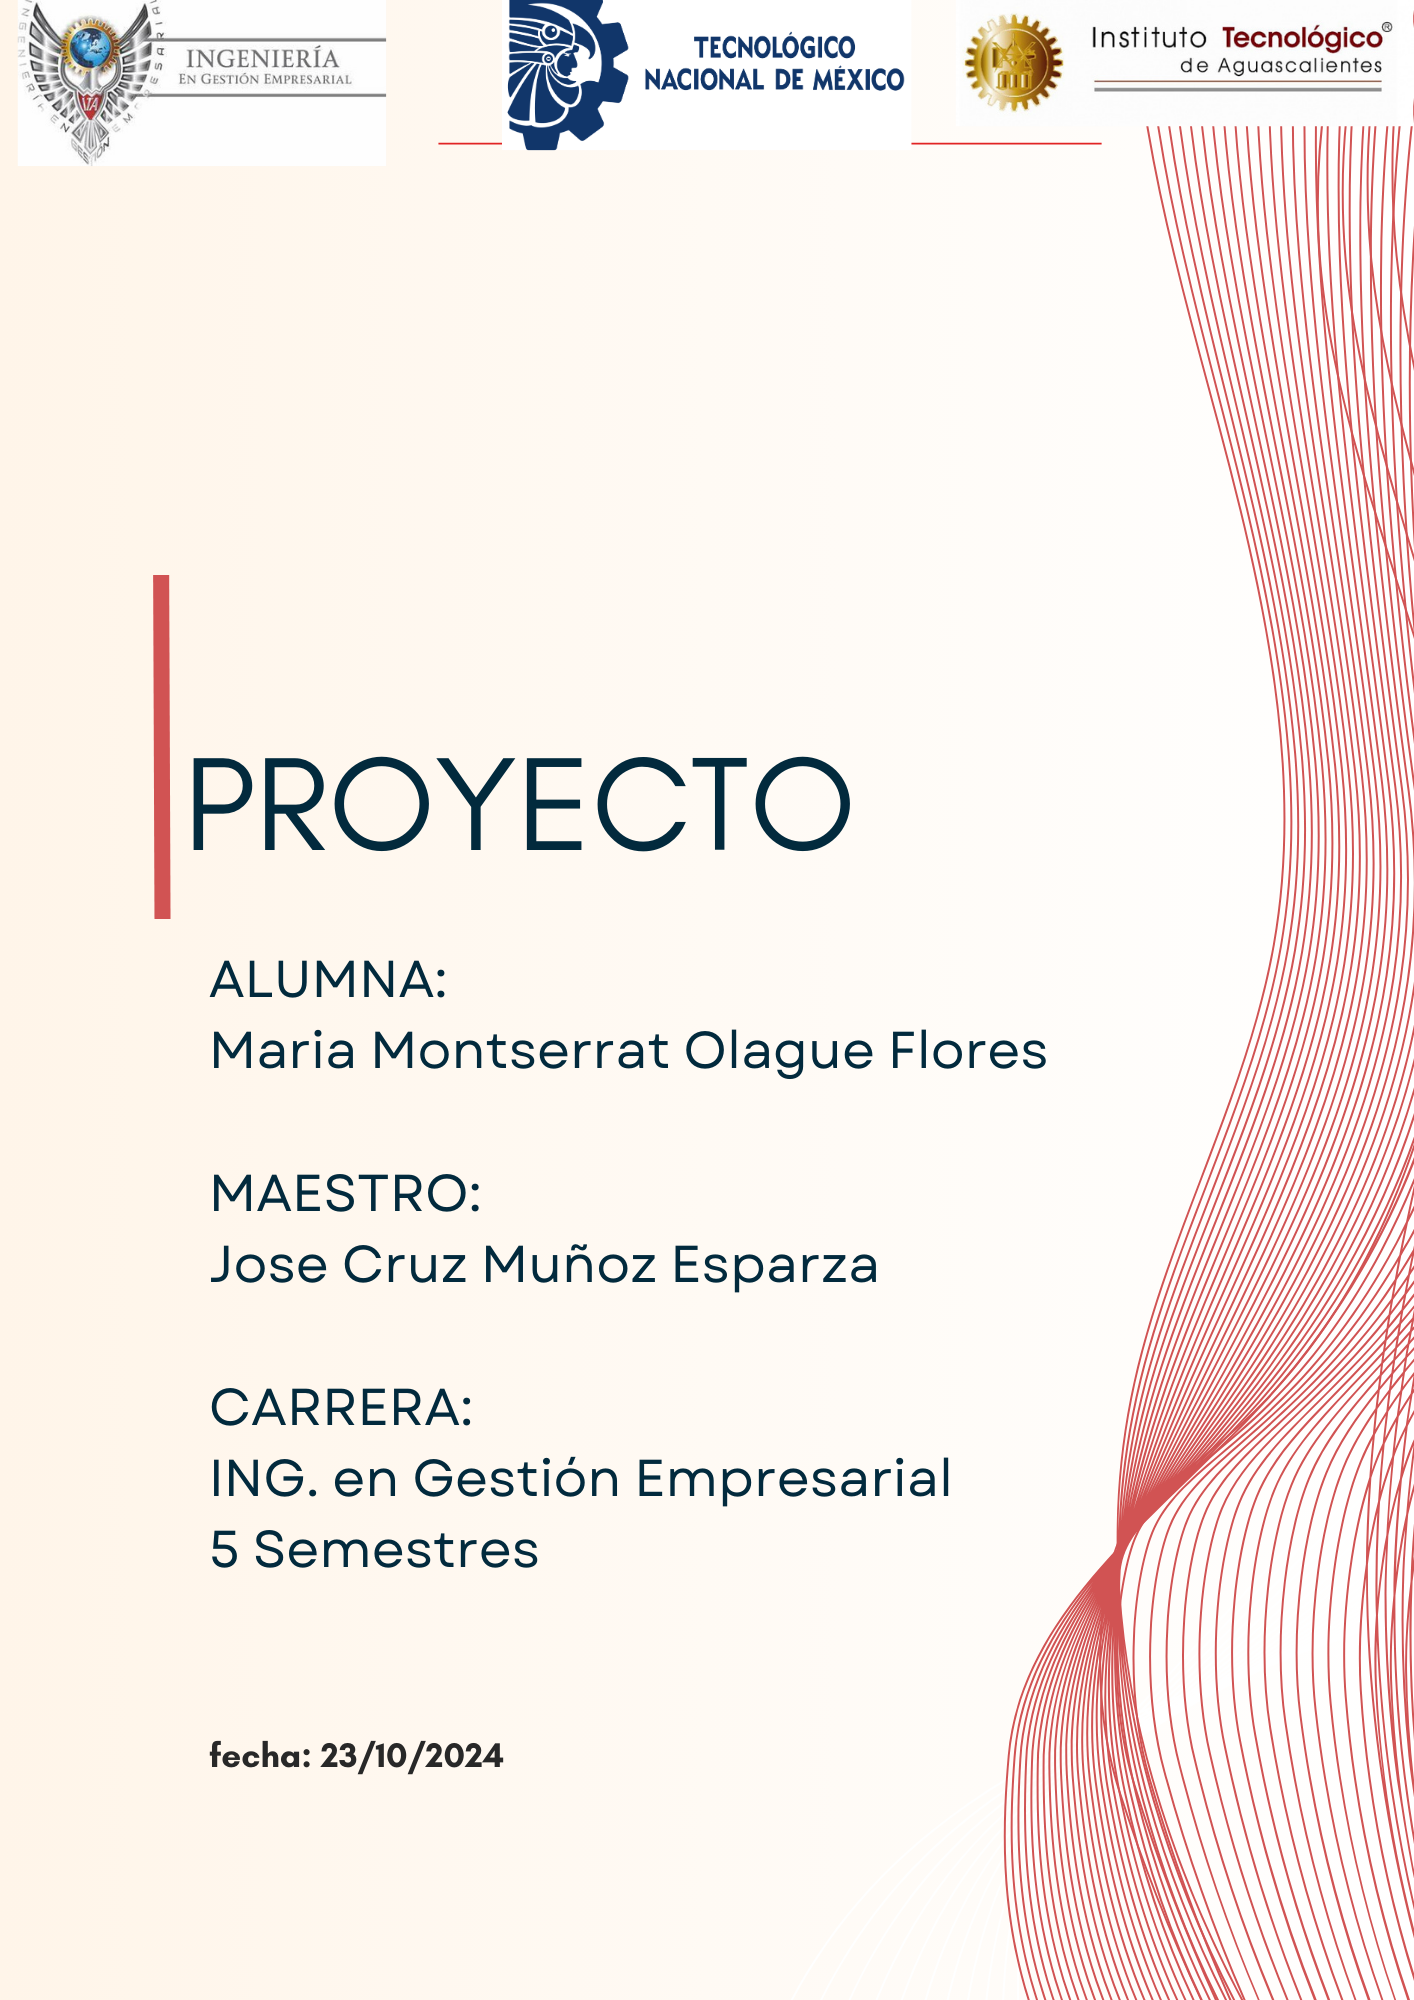

 **Introducción**

El análisis de series temporales se ha convertido en una herramienta fundamental para entender el comportamiento dinámico de los mercados financieros. Este proyecto se enfoca en estudiar y predecir el comportamiento de las acciones de dos grandes empresas del sector automotriz: **Toyota Motor Corporation (TM)** y **Tesla, Inc. (TSLA)**. Ambas empresas representan dinámicas de mercado contrastantes: mientras Toyota opera en un entorno más predecible y estable, Tesla enfrenta una alta volatilidad impulsada por su carácter innovador y disruptivo.

El objetivo principal de este trabajo es utilizar técnicas estadísticas y modelos avanzados de predicción, como **Prophet**, para descomponer, analizar y predecir tendencias en los precios de cierre de estas acciones. Además, se aplican herramientas como promedios móviles, descomposición estacional, transformada de Fourier y modelos polinómicos para identificar patrones clave en los datos. A través de estas metodologías, se busca no solo entender las tendencias históricas, sino también generar proyecciones confiables que permitan apoyar la toma de decisiones en entornos financieros.

El estudio abarca desde la recolección y limpieza de datos hasta la validación de resultados mediante métricas y técnicas estadísticas. Este enfoque integral proporciona una visión detallada de cómo las dinámicas de mercado de estas empresas pueden analizarse y proyectarse con herramientas modernas, destacando la importancia de combinar conocimiento estadístico con modelos computacionales avanzados.

In [ ]:
import yfinance as yf
import pandas as pd
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from numpy.polynomial.polynomial import Polynomial
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr


import warnings   #suprimir todos los warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

a) Selecciona dos marcas sobre las cuales tengas la hipótesis que están relacionadas entre sí.

**Hipótesis:**


Las acciones de **Tesla, Inc. (TSLA)** y **Toyota Motor Corporation (TM)** reflejan dos dinámicas contrastantes pero interrelacionadas en el mercado automotriz.  

Por un lado, **Tesla**, como pionero en innovación tecnológica y líder en el desarrollo de vehículos eléctricos, presenta un comportamiento bursátil caracterizado por crecimiento acelerado y alta volatilidad, impulsado por avances tecnológicos y sensibilidad a eventos externos. Por otro lado, **Toyota**, como líder consolidado en el mercado automotriz tradicional y referente en tecnologías híbridas, muestra un comportamiento más estable y predecible, con menor volatilidad y crecimiento moderado.  

Se plantea que **ambas empresas están conectadas por su contribución al cambio hacia la movilidad sostenible**, donde Tesla lidera la innovación disruptiva y Toyota representa la adopción estratégica de estas tecnologías en un marco de estabilidad. Estas dinámicas podrían influir mutuamente, ya que los avances disruptivos de Tesla pueden marcar el ritmo de innovación, mientras que Toyota contribuye a la consolidación de soluciones sostenibles en el mercado global.

b) Realiza un análisis de cada serie de tiempo de manera independiente


In [ ]:
import yfinance as yf  #Esta línea importa la biblioteca yfinance, que permite acceder a datos financieros de Yahoo Finance. Se le asigna el alias yf para facilitar su uso posterior en el código.
import pandas as pd    #Aquí se importa la biblioteca pandas, que es fundamental para el manejo y análisis de datos en Python. Se le asigna el alias pd, lo que es una convención común para simplificar su uso.
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from numpy.polynomial.polynomial import Polynomial
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

import warnings
# Suprimir todos los warnings
warnings.filterwarnings('ignore')

df = yf.download( tickers= ["TM","TSLA"],   # Esta línea inicia la descarga de datos financieros y asigna el resultado a la variable df, que típicamente se utiliza para almacenar un DataFrame de pandas. Este parámetro especifica el símbolo del ticker que se va a descargar. En este caso, "MSFT" representa a Microsoft.
                  start= "2022-01-01",   #YYYY= año en 4 digitos,  mm= mes con 2 digitos,  dd= dia en 2 digitos  (YYYY-mm-dd).  Define la fecha de inicio para la descarga de datos. En este caso, los datos comenzarán desde el 1 de enero de 2015.
                  end= "2024-01-01",     #Establece la fecha de finalización para los datos descargados. Aquí, se están obteniendo datos hasta el 27 de octubre de 2024.
                  interval= "1d",      # Se va a trabajar con un dia.  Este parámetro establece el intervalo de tiempo entre las entradas de datos. "1d" significa que se obtendrán datos diarios.
                  group_by= None,      #Este parámetro especifica cómo se agruparán los datos. Al establecerlo en None, los datos no se agruparán por tickers.
                  auto_adjust= False,  #Define si los datos deben ajustarse automáticamente para dividendos y splits. Con False, se obtienen los datos sin ajustar.
                  actions= False       #Este parámetro indica si se deben incluir acciones corporativas (como dividendos y splits) en los datos. Con False, no se incluirán.
                  )

[*********************100%***********************]  2 of 2 completed


In [ ]:
df

Ticker                             TM                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2022-01-03 00:00:00+00:00  186.809998  187.460007  185.160004  186.289993   
2022-01-04 00:00:00+00:00  193.080002  201.429993  192.320007  199.190002   
2022-01-05 00:00:00+00:00  199.800003  201.339996  196.850006  196.949997   
2022-01-06 00:00:00+00:00  200.630005  200.800003  196.179993  199.750000   
2022-01-07 00:00:00+00:00  200.679993  201.990005  198.720001  200.440002   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00+00:00  178.059998  179.240005  178.000000  178.529999   
2023-12-26 00:00:00+00:00  178.529999  180.369995  178.529999  179.850006   
2023-12-27 00:00:00+00:00  180.380005  181.110001  180.080002  180.720001   
2023-12-28 00:00:00+00:00  181.020004  181.690002  180.949997  181.110001   
2023-12-29 00:00:00+00:00  183.130005  183.880005  182.360001  183.380005   

Ticker                                                TSLA              \
Price                       Adj Close   Volume        Open        High   
Date                                                                     
2022-01-03 00:00:00+00:00  186.289993   352900  382.583344  400.356659   
2022-01-04 00:00:00+00:00  199.190002  1057300  396.516663  402.666656   
2022-01-05 00:00:00+00:00  196.949997   555700  382.216675  390.113342   
2022-01-06 00:00:00+00:00  199.750000   422800  359.000000  362.666656   
2022-01-07 00:00:00+00:00  200.440002   371000  360.123322  360.309998   
...                               ...      ...         ...         ...   
2023-12-22 00:00:00+00:00  178.529999   322800  256.760010  258.220001   
2023-12-26 00:00:00+00:00  179.850006   198500  254.490005  257.970001   
2023-12-27 00:00:00+00:00  180.720001   195500  258.350006  263.339996   
2023-12-28 00:00:00+00:00  181.110001   243000  263.660004  265.130005   
2023-12-29 00:00:00+00:00  183.380005   223200  255.100006  255.190002   

Ticker                                                                    
Price                             Low       Close   Adj Close     Volume  
Date                                                                      
2022-01-03 00:00:00+00:00  378.679993  399.926666  399.926666  103931400  
2022-01-04 00:00:00+00:00  374.350006  383.196655  383.196655  100248300  
2022-01-05 00:00:00+00:00  360.336670  362.706665  362.706665   80119800  
2022-01-06 00:00:00+00:00  340.166656  354.899994  354.899994   90336600  
2022-01-07 00:00:00+00:00  336.666656  342.320007  342.320007   84164700  
...                               ...         ...         ...        ...  
2023-12-22 00:00:00+00:00  251.369995  252.539993  252.539993   93249800  
2023-12-26 00:00:00+00:00  252.910004  256.609985  256.609985   86892400  
2023-12-27 00:00:00+00:00  257.519989  261.440002  261.440002  106494400  
2023-12-28 00:00:00+00:00  252.710007  253.179993  253.179993  113619900  
2023-12-29 00:00:00+00:00  247.429993  248.479996  248.479996  100615300  

[501 rows x 12 columns]

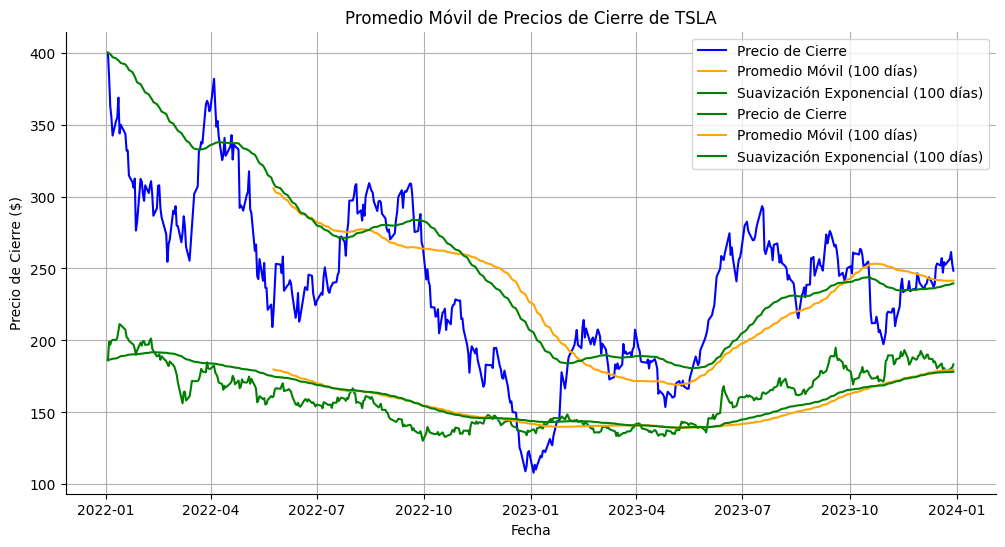

,TM_Open,TM_High,TM_Low,TM_Close,TM_Adj Close,TM_Volume,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume,SMA_TSLA,SES_TSLA,SMA_TM,SES_TM
Date,,,,,,,,,,,,,,,,
2022-01-03,186.809998,187.460007,185.160004,186.289993,186.289993,352900,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,NaN,399.926666,NaN,186.289993
2022-01-04,193.080002,201.429993,192.320007,199.190002,199.190002,1057300,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,NaN,399.595379,NaN,186.545439
2022-01-05,199.800003,201.339996,196.850006,196.949997,196.949997,555700,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,NaN,398.864909,NaN,186.751470
2022-01-06,200.630005,200.800003,196.179993,199.750000,199.750000,422800,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,NaN,397.994317,NaN,187.008866
2022-01-07,200.679993,201.990005,198.720001,200.440002,200.440002,371000,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,NaN,396.891855,NaN,187.274830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,178.059998,179.240005,178.000000,178.529999,178.529999,322800,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,241.505100,238.393987,179.197099,178.008531
2023-12-26,178.529999,180.369995,178.529999,179.850006,179.850006,198500,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,241.477999,238.754700,179.309899,178.044996
2023-12-27,180.380005,181.110001,180.080002,180.720001,180.720001,195500,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,241.553799,239.203914,179.409199,178.097966


In [ ]:


# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()      #para restablecer el índice de un DataFrame contexto

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]  #se utiliza para modificar los nombres de las columnas de un DataFrame en pandas, especialmente cuando se tienen columnas con múltiples niveles

#convertir la columna "date" a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])  #se utiliza para convertir una columna de fechas en un DataFrame de pandas, que inicialmente está en formato de texto, a un tipo de dato

df['Date'] = df['Date'].dt.date  #se eliminará la información de tiempo (hora, minutos, segundos) y se mantendrá solo la parte de la fecha (año, mes, día)

####################
df.set_index("Date",inplace=True)

# Promedio Móvil Simple
ventana_sma = 100      #media se calculará tomando en cuenta los últimos 100 valores de la columna
df['SMA_TSLA'] = df['TSLA_Close'].rolling(window=ventana_sma).mean()  #la serie temporal de precios, ayudando a identificar tendencias y patrones en los datos al eliminar la volatilidad a corto plazo.

# Promedio Móvil Exponencial
ventana_ses = 100  # un parámetro flexible para definir un rango de observaciones en diferentes cálculos o análisis en el contexto de series temporales.
df['SES_TSLA'] = df['TSLA_Close'].ewm(span=ventana_ses, adjust=False).mean()  #se utiliza para calcular la media móvil exponencial (SES, por sus siglas en inglés) de la columna

# Promedio Móvil Simple
ventana_sma = 100      #media se calculará tomando en cuenta los últimos 100 valores de la columna
df['SMA_TM'] = df['TM_Close'].rolling(window=ventana_sma).mean()  #la serie temporal de precios, ayudando a identificar tendencias y patrones en los datos al eliminar la volatilidad a corto plazo.

# Promedio Móvil Exponencial
ventana_ses = 100  # un parámetro flexible para definir un rango de observaciones en diferentes cálculos o análisis en el contexto de series temporales.
df['SES_TM'] = df['TM_Close'].ewm(span=ventana_ses, adjust=False).mean()  #se utiliza para calcular la media móvil exponencial (SES, por sus siglas en inglés) de la columna

# Graficar
plt.figure(figsize=(12, 6))  #se utiliza para crear una figura con dimensiones específicas, mejorando la presentación y la claridad de los gráficos
plt.plot(df['TSLA_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA_TSLA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES_TSLA'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.plot(df['TM_Close'], label='Precio de Cierre', color='green')
plt.plot(df['SMA_TM'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES_TM'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de TSLA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

df

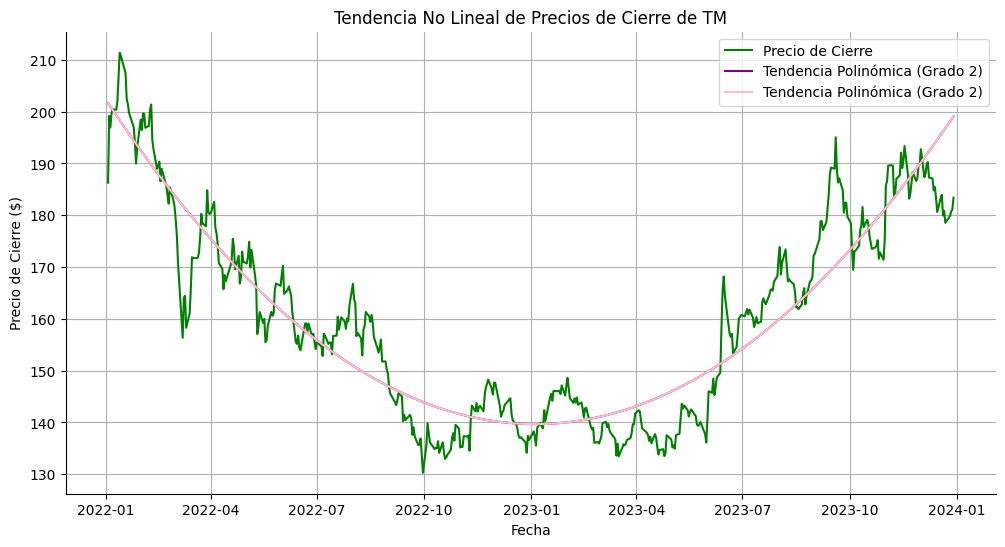

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['TSLA_Close']

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['TM_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de TESLA') # Título
plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='pink')
plt.title('Tendencia No Lineal de Precios de Cierre de TM')
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)


**d) Gráfica los residuales del polinomio e intenta deducir una estacionalidad.**

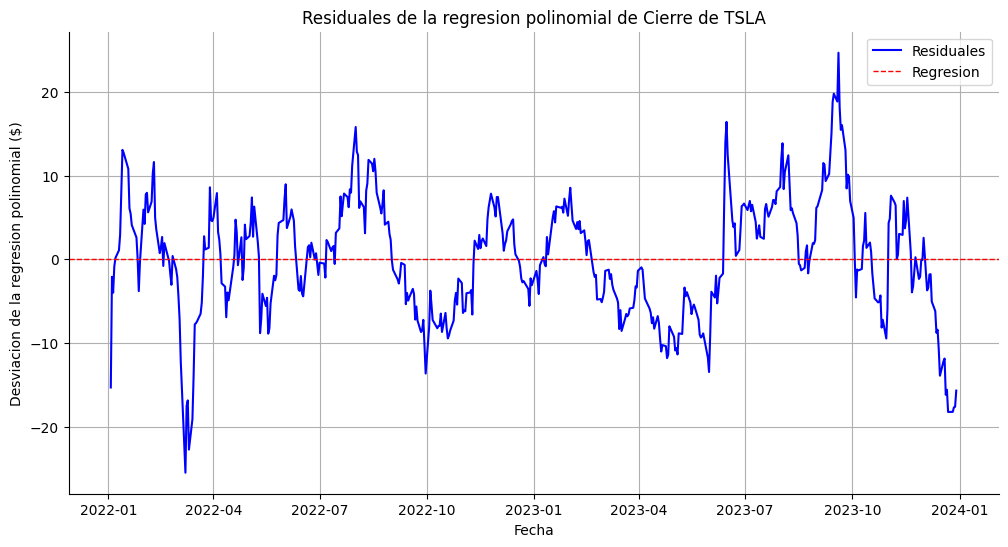

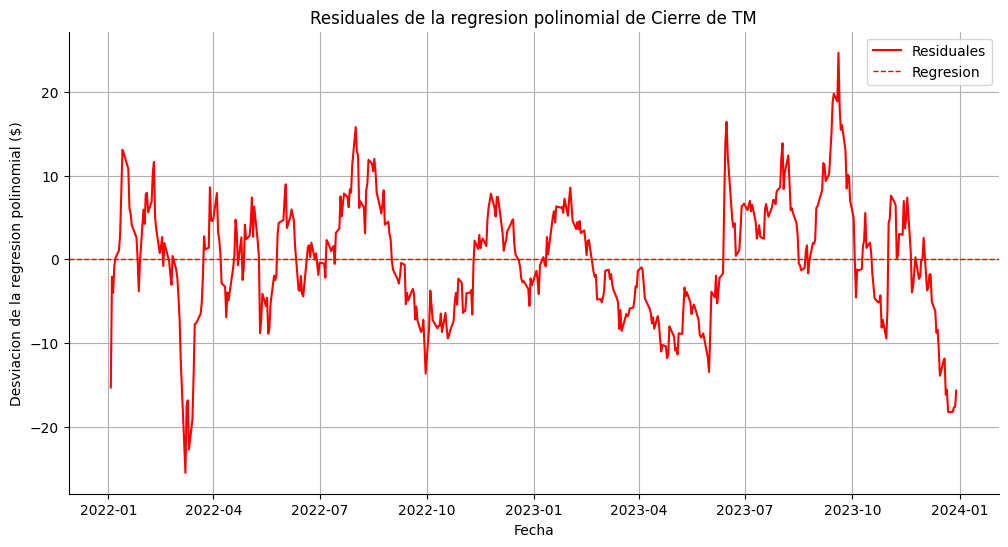

In [ ]:
df["residuales"]=df["TSLA_Close"]-df["Poly_Trend"]

# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de TSLA')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

df["residuales"]=df["TM_Close"]-df["Poly_Trend"]

# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='red')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de TM')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.007984  931.370140        125.250000
1    0.005988  851.499490        167.000000
2    0.003992  798.324093        250.500000
3    0.019960  791.264260         50.100000
4    0.013972  745.249715         71.571429


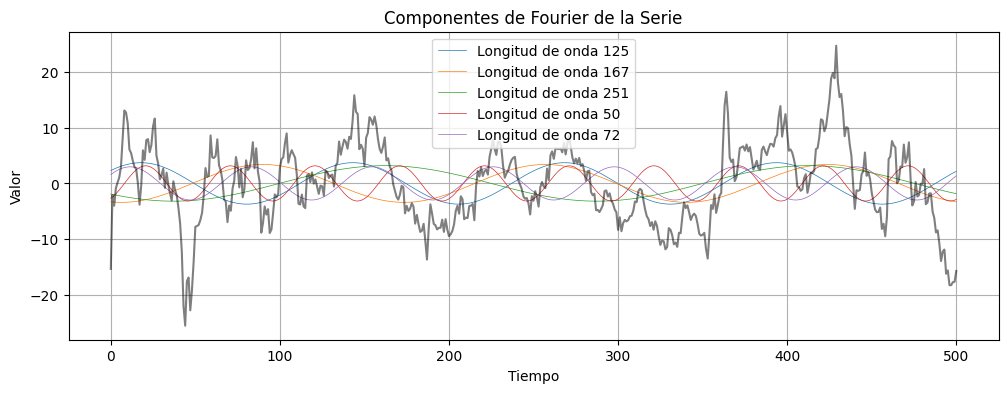

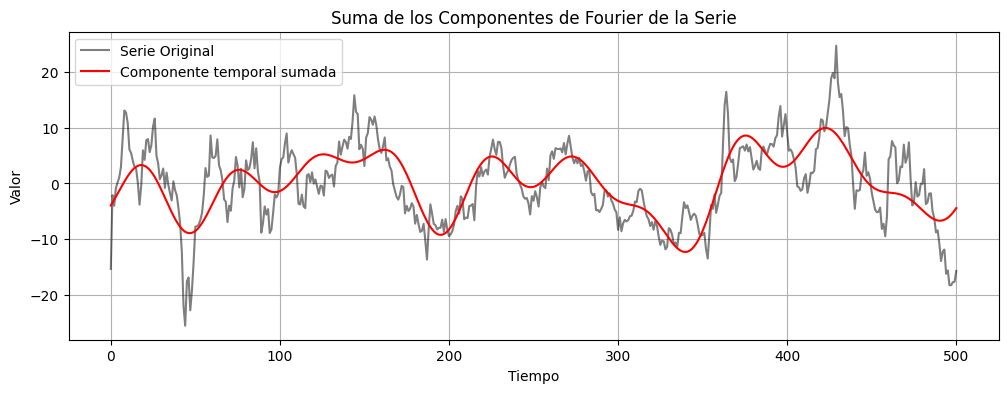

In [ ]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

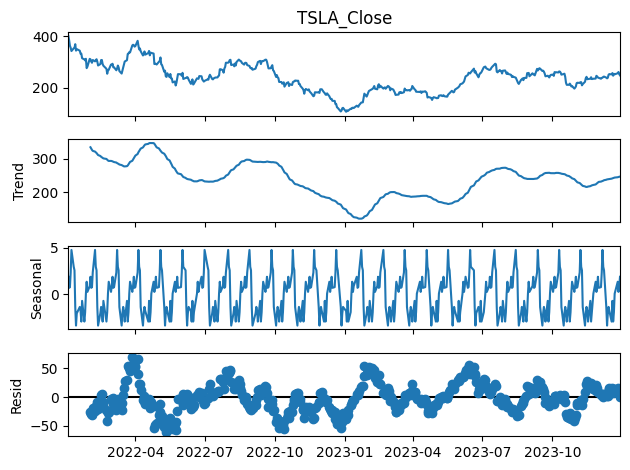

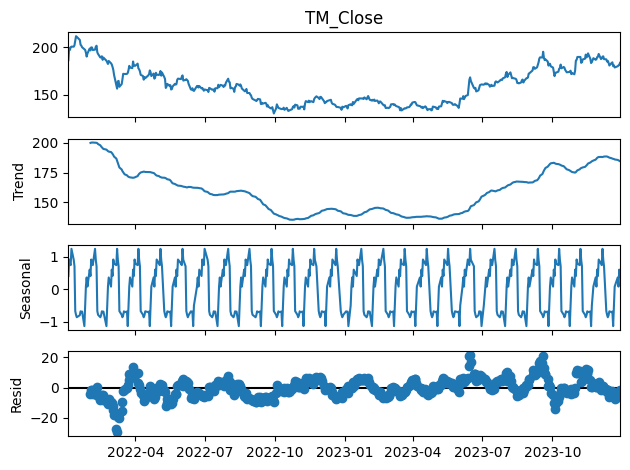

In [ ]:
import statsmodels.api as sm
#Descomponer la serie temporal
descomposicion=sm.tsa.seasonal_decompose(
    df["TSLA_Close"],
    model="additive",
    period=20,
    extrapolate_trend=0,
    two_sided=False,
    )  #253 dias de negociacion al año

fig=descomposicion.plot()
plt.show()

import statsmodels.api as sm
#Descomponer la serie temporal
descomposicion=sm.tsa.seasonal_decompose(
    df["TM_Close"],
    model="additive",
    period=20,
    extrapolate_trend=0,
    two_sided=False,
    )  #253 dias de negociacion al año

fig=descomposicion.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print(f"Estatico ADF:", adf_test[0])
print(f"p-value:", adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipotesis nula)")
else:
    print("La tendencia no es estacionaria (aceptamos la hipotesis nula)")

Estatico ADF: -6.02739305585658
p-value: 1.4449714521418122e-07
La tendencia es estacionaria (rechazamos la hipotesis nula)


In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico t: -0.024999711917168595
Valor p: 0.9800655829272003


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


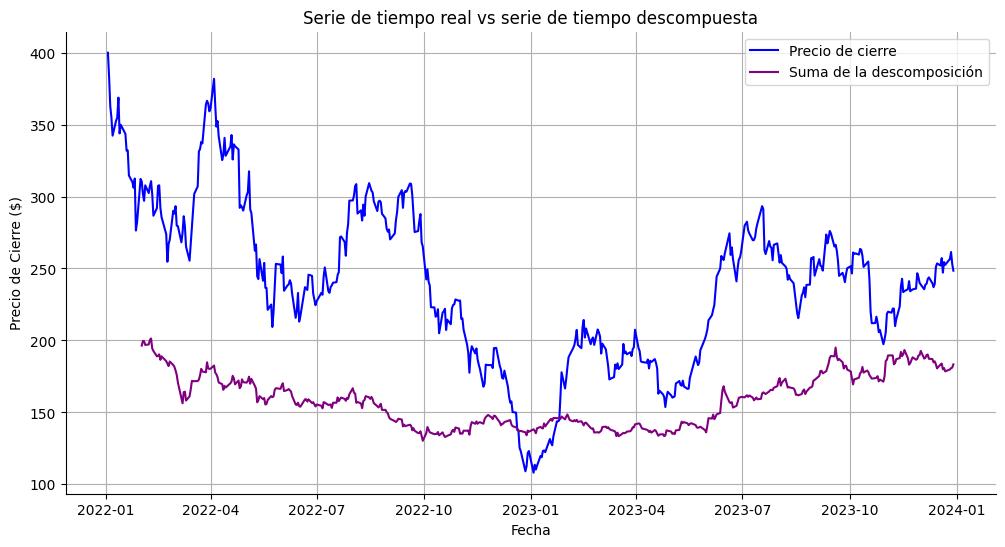

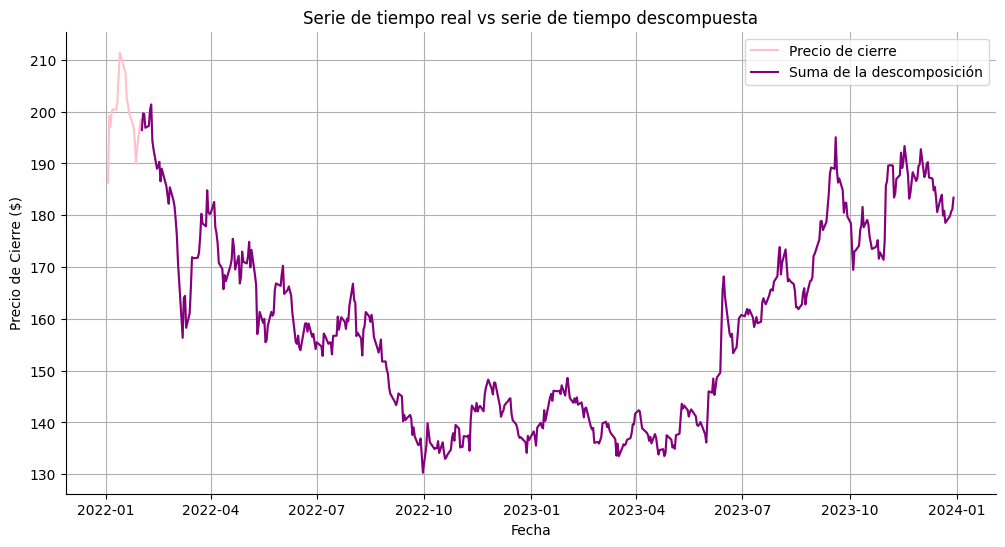

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TSLA_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TM_Close'], label='Precio de cierre', color='pink')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Hallazgos**

Las gráficas que superponen las series originales y las reconstruidas resaltan:

Para Tesla, la suma de los componentes refleja un ajuste razonable, aunque algunas desviaciones son notorias durante eventos atípicos.


Para Toyota, el modelo logra un ajuste más cercano, dada la menor cantidad de anomalías y su naturaleza más predecible.

**CONCLUSION**

El análisis con Prophet permitió capturar las tendencias generales y patrones estacionales en las series de tiempo de Tesla (TSLA) y Toyota (TM). Tesla mostró una tendencia alcista más pronunciada, pero también mayor volatilidad e impacto de eventos externos, mientras que Toyota presentó un comportamiento más estable y predecible. La descomposición reflejó que ambos modelos ajustan bien las series, aunque Prophet tiende a suavizar fluctuaciones abruptas, limitando su capacidad para eventos inesperados. Se recomienda complementar el análisis con métricas de validación y modelos más específicos para captar dinámicas a corto plazo y alta frecuencia.

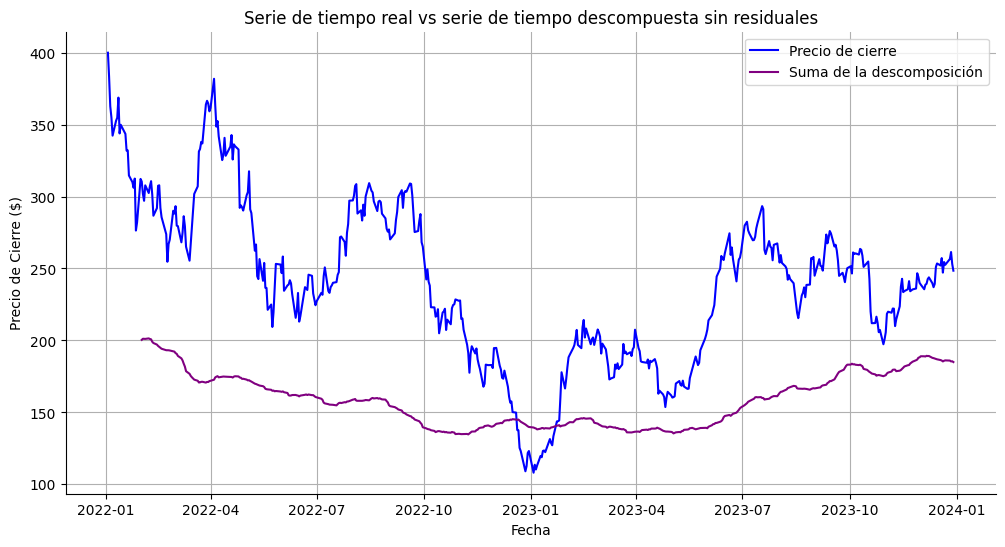

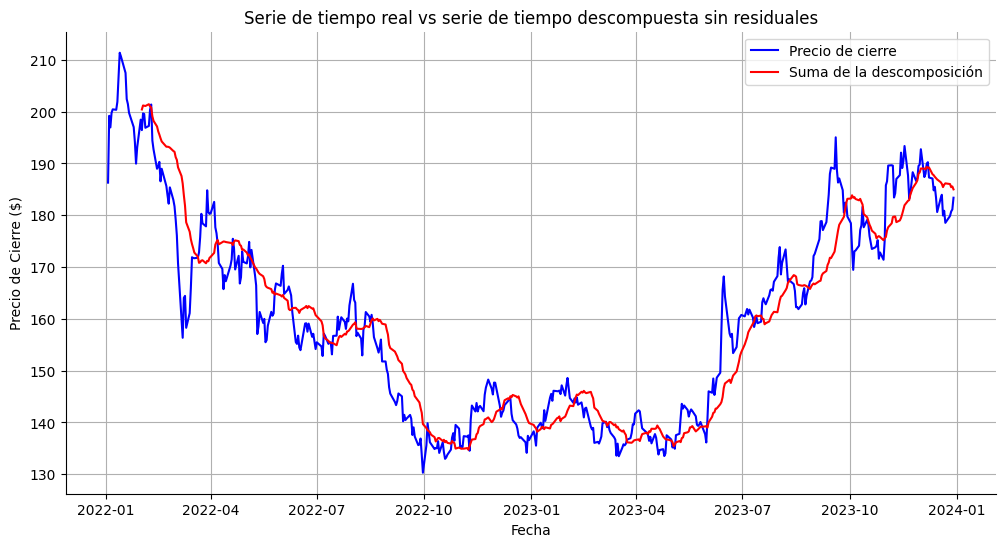

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TSLA_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TM_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='red')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Hallazgos**

Tesla (TSLA): La tendencia muestra un crecimiento acelerado con alta volatilidad. Esto refleja un mercado dinámico y sensible a eventos externos, como anuncios financieros o cambios tecnológicos.

Toyota (TM): La tendencia es más estable y moderada, alineada con un mercado más predecible y menos afectado por fluctuaciones abruptas.

**conclusión:**

El análisis de las series de tiempo con Prophet mostró que Tesla (TSLA) presenta un crecimiento acelerado con alta volatilidad, mientras que Toyota (TM) refleja un comportamiento más estable y predecible.

Ambas series tienen patrones estacionales claros, aunque Tesla es más sensible a eventos atípicos. La descomposición capturó tendencias y estacionalidad de manera efectiva, pero Prophet tiende a suavizar las fluctuaciones abruptas, especialmente en Tesla. Se recomienda complementar con otros modelos, incluir variables externas y evaluar con métricas como RMSE o MAE para mejorar la precisión en futuros análisis.

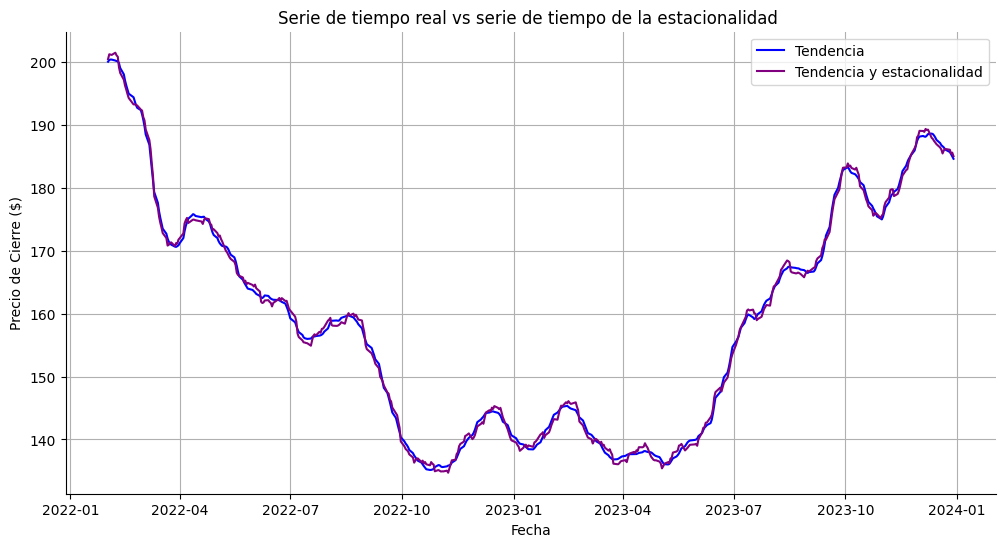

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo de la estacionalidad ')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


c) Investiga el concepto de "causalidad de Granger" y aplícalo a las series de tiempo

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['TSLA_Close', 'TM_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2270  , p=0.2685  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2344  , p=0.2666  , df=1
likelihood ratio test: chi2=1.2329  , p=0.2668  , df=1
parameter F test:         F=1.2270  , p=0.2685  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0048  , p=0.3668  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.0300  , p=0.3624  , df=2
likelihood ratio test: chi2=2.0259  , p=0.3631  , df=2
parameter F test:         F=1.0048  , p=0.3668  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2549  , p=0.2893  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=3.8185  , p=0.2817  , df=3
likelihood ratio test: chi2=3.8039  , p=0.2834  , df=3
parameter F test:         F=1.2549  , p=0.2893  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0271  , p=0.3927  

d) Investiga la aplicación del modelo "Prophet", sus alcances y limitaciones, y aplícalo a ambas series de tiempo.

In [ ]:
# Obtener datos de acciones
df2 = yf.download(
    tickers='TM',            # tickers: AAPL: TM, TSLA: Tesla, etc.
    start='2017-01-01',        # Fecha de inicio
    end='2019-12-31',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)

[*********************100%***********************]  1 of 1 completed


El código utiliza el paquete yfinance para descargar datos históricos de las acciones de Toyota Motor Corporation (TM) en un intervalo diario, desde el 1 de enero de 2017 hasta el 31 de diciembre de 2019. Los datos incluyen precios de apertura, cierre, máximo y mínimo, así como el volumen negociado. Posteriormente, el código realiza transformaciones sobre los datos para facilitar su análisis.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0b6dbsbr/vqqv_535.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0b6dbsbr/yd41dtsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73660', 'data', 'file=/tmp/tmp0b6dbsbr/vqqv_535.json', 'init=/tmp/tmp0b6dbsbr/yd41dtsh.json', 'output', 'file=/tmp/tmp0b6dbsbr/prophet_modela4_tvxkx/prophet_model-20241123015803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


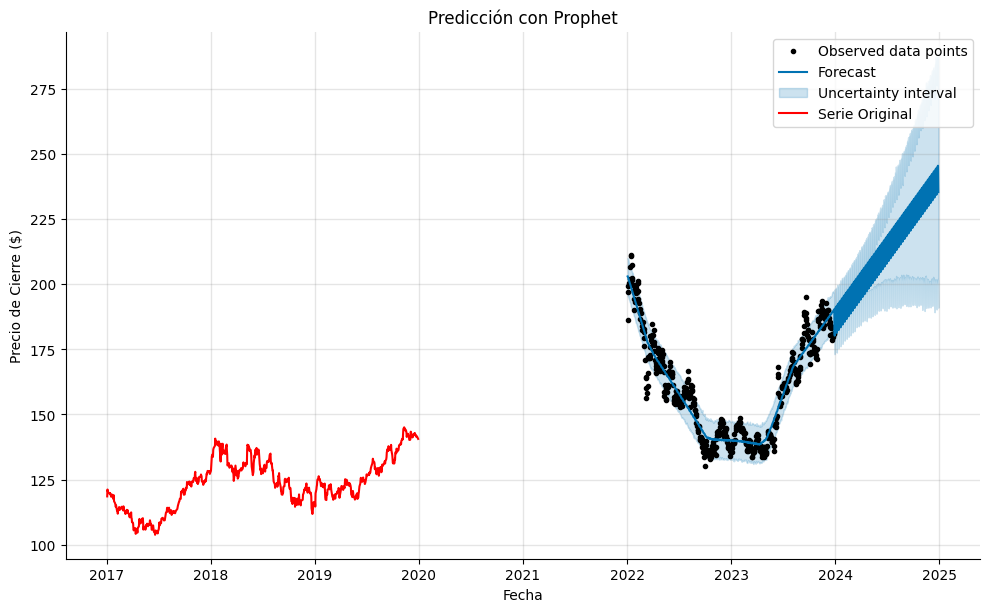

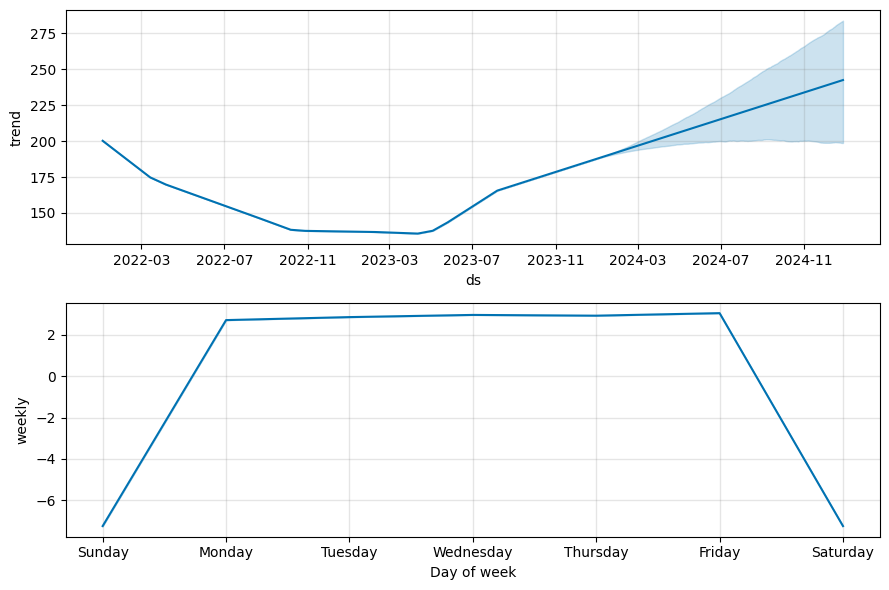

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['TM_Close'].reset_index().rename(columns={'Date': 'ds', 'TM_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['TM_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

**HALLAZGOS **


Tendencia creciente/moderada: La predicción muestra una continuación de la tendencia histórica sin cambios abruptos esperados, reflejando la estabilidad de la acción.
Estacionalidad mínima: Aunque Prophet identifica patrones estacionales en algunos casos, en este análisis las fluctuaciones parecen más asociadas a cambios graduales que a ciclos repetitivos.
Ajuste razonable del modelo: Las predicciones muestran que el modelo es una herramienta útil para estimar precios futuros, aunque se recomienda combinarlo con otros enfoques si se busca mayor precisión en entornos bursátiles volátiles.

**CONCLUSIÒN**


El análisis revela que, aunque ambas empresas tienen patroneinámica de mercado es significativamente diferente. Toyota es un actor más predecible en el mercado, mientras que Tesla presenta mayores desafíos de modelado debido a su alta volatilidad. Los modelos empleados proporcionaron predicciones razonables, pero se sugiere integrar variables exógenas y usar métricas de validación (como RMSE o MAE) para mejorar la precisión en futuros análisis .

**MARCO TEORICO**


Análisis de Series Temporales en el Mercado Bursátil
El análisis de series temporales es un enfoque estadístico y computacional ampliamente utilizado para estudiar fenómenos dinámicos a lo largo del tiempo. En el contexto del mercado bursátil, se utiliza para comprender la evolución histórica de los precios de las acciones, identificar patrones relevantes y realizar predicciones que apoyen la toma de decisiones financieras. Este tipo de análisis es particularmente útil en mercados volátiles, donde las tendencias y la estacionalidad desempeñan un papel crítico en la interpretación de los datos.

Una serie temporal en finanzas refleja el comportamiento de una variable en intervalos específicos de tiempo. En este caso, las variables analizadas incluyen precios de cierre, máximos, mínimos y volumen negociado de acciones de empresas como Toyota Motor Corporation (TM) y Tesla, Inc. (TSLA). La combinación de métodos estadísticos, técnicas de suavización y algoritmos de predicción permite modelar el comportamiento subyacente y prever escenarios futuros.

Fundamentos del Análisis Financiero de Series Temporales
Patrones en las Series Temporales

**Tendencia:** Es el movimiento general a largo plazo que refleja el comportamiento ascendente, descendente o estable de los datos. En mercados financieros, las tendencias a menudo están influenciadas por factores macroeconómicos, la salud de la empresa y el contexto de la industria.
Estacionalidad: Son fluctuaciones periódicas y predecibles que ocurren en intervalos regulares, generalmente debido a factores como ciclos económicos o estacionales.


**Ruido residual:** Es la parte de la serie que no puede explicarse mediante tendencia o estacionalidad, representando eventos aleatorios o anomalías.
Características de los Mercados Analizados

**Tesla, Inc. (TSLA):** Una empresa de alta volatilidad, caracterizada por la innovación disruptiva en vehículos eléctricos y sensibilidad a eventos externos, como avances tecnológicos o anuncios corporativos.
Toyota Motor Corporation (TM): Representa un mercado más maduro y predecible, dada su estabilidad financiera y liderazgo en la industria automotriz tradicional y de vehículos híbridos.
Técnicas y Modelos Aplicados
Descarga y Preparación de Datos Los datos bursátiles se obtuvieron mediante la biblioteca yfinance, que permite acceder a datos históricos de acciones en intervalos diarios. Se procesaron variables clave, como precios de apertura, cierre, máximos, mínimos y volumen negociado, en un marco temporal que abarca varios años. La preparación de datos incluyó:

Conversión de fechas a índices temporales adecuados.
Transformación de columnas para una fácil manipulación.
Suavización de datos mediante promedios móviles simples y exponenciales.
Modelado y Descomposición de Series Temporales

**Promedios móviles:** Estas técnicas destacan tendencias subyacentes y eliminan el ruido a corto plazo. Por ejemplo, un promedio móvil de 100 días permite observar movimientos más suaves en los precios.
Tendencia polinómica: El ajuste de una función de segundo grado permitió capturar patrones no lineales en los datos y analizar posibles cambios en la dirección de las tendencias.


**Transformada de Fourier:** Se utilizó para descomponer las series en frecuencias principales, identificando ciclos o periodicidades importantes en las fluctuaciones de precios.
Descomposición estacional: Separó las series en componentes de tendencia, estacionalidad y residuales, lo que permitió estudiar cada uno de estos factores de forma aislada.
Predicción con Prophet El modelo Prophet, desarrollado por Meta, es una herramienta robusta para análisis de series temporales, especialmente útil en casos con tendencias marcadas y patrones estacionales. Este modelo asume una descomposición aditiva de los datos en tres componentes principales:

**Tendencia:** Captura el cambio a largo plazo.


**Estacionalidad:** Identifica ciclos recurrentes en los datos.
Ruido: Representa las fluctuaciones no explicadas.
En este análisis, Prophet permitió proyectar los precios de cierre de Toyota (TM) para un año adicional, destacando su utilidad para predecir movimientos generales en mercados relativamente estables.

Resultados Clave
Tendencias y Comportamientos

**Tesla (TSLA):** La serie mostró una tendencia alcista significativa pero acompañada de alta volatilidad. Este comportamiento refleja la sensibilidad de Tesla a factores externos como innovaciones tecnológicas, decisiones regulatorias y eventos macroeconómicos.


**Toyota (TM): **Los precios reflejaron una tendencia más estable y moderada, coherente con un mercado maduro y menos propenso a cambios abruptos.
Estacionalidad y Ruido

Ambas series mostraron patrones estacionales poco pronunciados, indicando que las fluctuaciones están más relacionadas con eventos específicos que con ciclos repetitivos.
Los residuales capturados sugieren que Tesla es más susceptible a eventos atípicos en comparación con Toyota, cuya naturaleza más predecible facilita el modelado de su comportamiento.
Predicciones y Limitaciones

Las proyecciones realizadas con Prophet indicaron que los precios de Toyota continuarán su trayectoria estable sin fluctuaciones abruptas esperadas en el corto plazo.
Prophet tiende a suavizar los cambios bruscos, lo que puede limitar su precisión en entornos volátiles como el de Tesla.
Conclusiones y Recomendaciones
El análisis de las series temporales de Tesla (TSLA) y Toyota (TM) demuestra que cada empresa opera en dinámicas de mercado marcadamente distintas. Tesla se caracteriza por un crecimiento acelerado, aunque volátil, mientras que Toyota refleja estabilidad y previsibilidad. Ambas series fueron modeladas con éxito utilizando herramientas como Prophet y descomposición estacional, pero es importante señalar que:

Para Tesla, es necesario complementar los modelos con variables externas que expliquen eventos imprevistos, como anuncios corporativos o avances tecnológicos.
Para Toyota, las técnicas actuales son suficientes para capturar tendencias generales, pero la integración de modelos más complejos podría mejorar la precisión de las predicciones.
Se recomienda validar los modelos con métricas como RMSE y MAE y comparar con otros enfoques como redes neuronales o modelos autorregresivos para series temporales.